In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Global Power Plant Database

#### Problem Statement:
   __Description__

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Prediction :  
  Make two prediction  __1) Fuel Type__           __2) capacity_mw__ 

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"database_IND.csv")
df.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.434200,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000,Central Electricity Authority,NaN


## Data pre-processing  &  EDA

In [3]:
#lets drop country and country_long lolumn as its just contains country name
colms = ["country","country_long"]
df.drop(columns = colms, axis = 1, inplace = True)

In [4]:
#lets check entries in generation_data_source column
df["generation_data_source"].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

* As generation_data_source column has same entries through out we will drop this column

In [5]:
df.drop(columns = "generation_data_source", inplace = True)

In [6]:
#check the shape of our data, to know number of samples
df.shape

(908, 22)

In [7]:
#Lets check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      908 non-null    object 
 1   gppd_idnr                 908 non-null    object 
 2   capacity_mw               908 non-null    float64
 3   latitude                  862 non-null    float64
 4   longitude                 862 non-null    float64
 5   primary_fuel              908 non-null    object 
 6   other_fuel1               199 non-null    object 
 7   other_fuel2               1 non-null      object 
 8   other_fuel3               0 non-null      float64
 9   commissioning_year        528 non-null    float64
 10  owner                     342 non-null    object 
 11  source                    908 non-null    object 
 12  url                       908 non-null    object 
 13  geolocation_source        889 non-null    object 
 14  wepp_id   

In [8]:
#In columns estimated_generation_gwh and wepp_id all entries are null so we will drop these also
col = ["estimated_generation_gwh","wepp_id"]
df.drop(columns = col, inplace = True)

In [9]:
#lets check the name column entries
df['name'].value_counts()

THAL WORKS                1
SEIONI TPP                1
SIIL Jaibhim Wind Farm    1
PATHRI                    1
UPPER SILERU I&II         1
                         ..
SANKESHWAR MILL           1
URI                       1
ROSA TPP PH - 1           1
JEGURUPADU GT             1
BUTIBORI TPP -II          1
Name: name, Length: 908, dtype: int64

* Name column has the unique name for every plant. we can drop this column also

In [10]:
df.drop(columns = "name", inplace = True)

In [11]:
# lets check entries in gppd_idnr
df["gppd_idnr"].value_counts()

IND0000222    1
IND0000331    1
WRI1026183    1
IND0000446    1
IND0000338    1
             ..
WRI1019923    1
WRI1026109    1
WRI1019894    1
IND0000273    1
WRI1026760    1
Name: gppd_idnr, Length: 908, dtype: int64

* this column also contains unique ID for every plant so we will drop this column as it is not required for prediction. 

In [12]:
df.drop(columns = "gppd_idnr", inplace = True)

In [13]:
#other_fuel1 column contains about 78% null data
#other_fuel2 contains only one entry
#other_fuel3 contains 0 entries 
# So I decided to drop these columns
drop_clms = ["other_fuel1","other_fuel2","other_fuel3"]
df.drop(columns = drop_clms, inplace = True)

In [14]:
#column url is not contributing to prediction, we will drop this column as well
df.drop(columns = "url", inplace = True)

In [15]:
#owner column has more than 60% of null values, and it may not required for prediction also, we can drop this column
df.drop(columns = "owner", inplace = True)

In [16]:
#check year_of_capacity_data column
df["year_of_capacity_data"].unique()
#as it is having same entries through out, we can drop this column also

array([  nan, 2018.])

In [17]:
df.drop(columns = "year_of_capacity_data", inplace = True)

In [18]:
#As latitude ans longitude having only geometricat co-ordinates and it will not cpntributing to target variables, we can drop these columns 
clms = ["latitude","longitude"]
df.drop(columns = clms, inplace = True)

In [19]:
#lets check null values in dataset
df.isnull().sum()

capacity_mw              0
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [20]:
df["commissioning_year"].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [21]:
#Lets impute missing values
df.fillna(value = 0 ,inplace = True)   #replace NaN with 0
df['commissioning_year'].replace(0, df['commissioning_year'].median(),inplace = True)

In [22]:
#lets use commissioning_year to know how old the power plant is and make a column Power_plant_Years
df['Power_plant_Years'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

In [23]:
#Lets impute all the null values from below columns with their respective median
df['generation_gwh_2013'].replace(0, df['generation_gwh_2013'].median(),inplace = True)

df['generation_gwh_2014'].replace(0, df['generation_gwh_2014'].median(),inplace = True)

df['generation_gwh_2015'].replace(0, df['generation_gwh_2015'].median(),inplace = True)

df['generation_gwh_2016'].replace(0, df['generation_gwh_2016'].median(),inplace = True)

df['generation_gwh_2017'].replace(0, df['generation_gwh_2017'].median(),inplace = True)

In [24]:
#check for null values again
df.isnull().sum()

capacity_mw            0
primary_fuel           0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
Power_plant_Years      0
dtype: int64

In [25]:
#Lets have a look on entries from geolocation_source column
df["geolocation_source"].value_counts()

WRI                                     766
Industry About                          119
0                                        19
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [26]:
#we will replace 0 with most frequent element in geolocation_source column
df['geolocation_source'].replace(0, 'WRI',inplace = True)

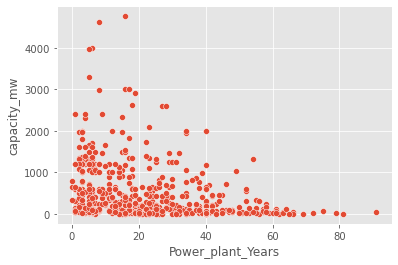

In [27]:
#lets see how plant age affects capacity_mw
plt.style.use('ggplot')
sns.scatterplot(x = "Power_plant_Years", y = "capacity_mw", data = df)
plt.show()

* from this plot we can say that older powerplants has lower capacity_mw compared to plants which have started recently.

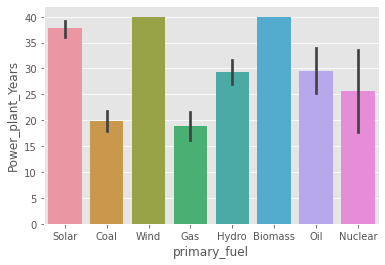

In [28]:
#lets have a look on relation between fuel used and powerplant age
sns.barplot(x = "primary_fuel", y = "Power_plant_Years", data = df)
plt.show()

* From this plot we can say that most of the older plants uses biomass, solar and wind energy to generate electricity.
* And the power plants which are started recently uses coal, gases and nuclear energy to generate electricity.

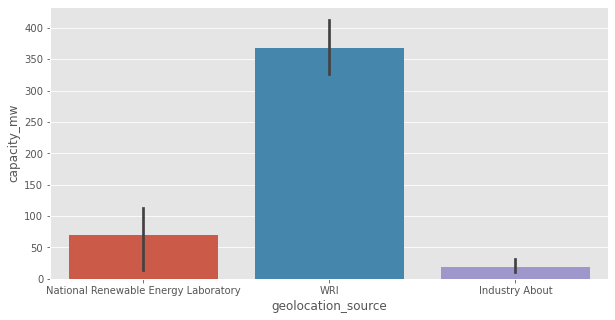

In [29]:
#Lets have a look on relation between source and capacity_mw
plt.figure(figsize = (10,5))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

Here we can see there are maximum number of geolocation_source of category WRI.

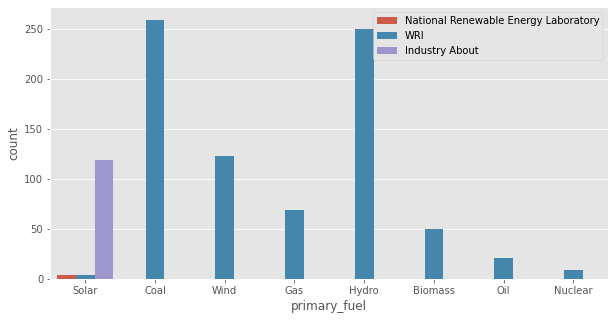

In [30]:
#lets see how geolocation_source related with primary fuel
plt.figure(figsize = (10,5))
sns.countplot(x = "primary_fuel", hue = "geolocation_source", data = df)
plt.legend()
plt.legend(loc = 'upper right')
plt.show()

* For solar plants only the geolocation_source is of three different types, and for rest all plants the geolocation_source is WRI.

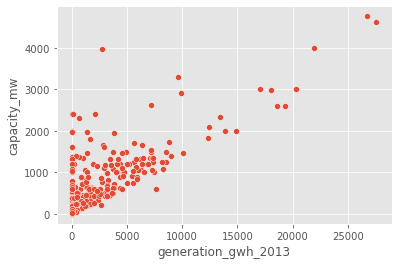

In [31]:
#lets have a look on generation_gwh_2013 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2013', y = 'capacity_mw', data = df)
plt.show()

* This will tell us when power generation growth is more than 5000, capacity_mw is also above 1000MW.

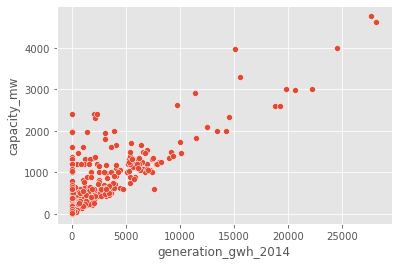

In [32]:
#lets have a look on generation_gwh_2014 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2014', y = 'capacity_mw', data = df)
plt.show()

* Here also generation_gwh_2014 is linearly related to capacity_mw and maximum generation growth is below 30000.

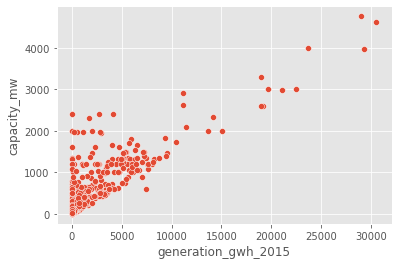

In [33]:
#lets have a look on generation_gwh_2015 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2015', y = 'capacity_mw', data = df)
plt.show()

* We can see generation_gwh_2015 is linearly related to capacity_mw, and maximum generation growth is slightly more than 30000 

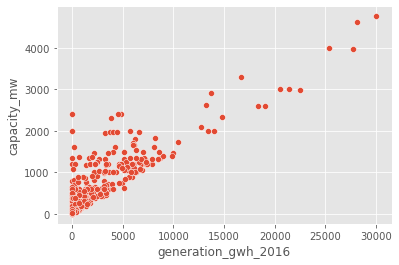

In [34]:
#lets have a look on generation_gwh_2016 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2016', y = 'capacity_mw', data = df)
plt.show()

* We can see generation_gwh_2016 is linearly related to capacity_mw, and maximum generation growth is close to 30000 

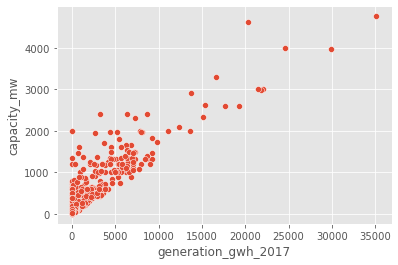

In [35]:
#lets have a look on generation_gwh_2017 vs capacity_mw
sns.scatterplot(x = 'generation_gwh_2017', y = 'capacity_mw', data = df)
plt.show()

* Among these four yeae the maximumm generation growth is observed in generation_gwh_2017 that is around 35000.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

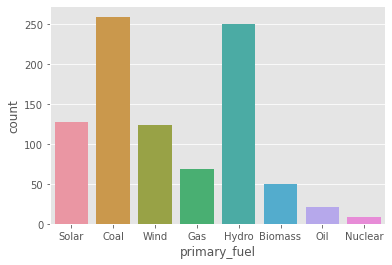

In [36]:
#check how primary fuel affects capacity_mw
sns.countplot(df["primary_fuel"])

* Here we can say in India there are large number of hydro and coal power generation plants compared to others.
* Power plants using wind and solar energy are moderate in numbers.
* There are very less number of plants using Oil and nuclear energy to generate power

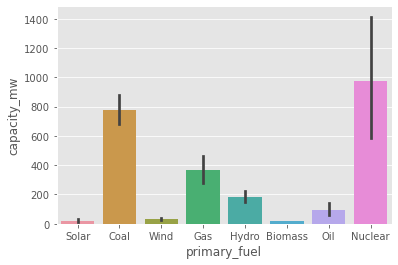

In [37]:
#Lets plot the bar plot for primary_fuel based on capaciy_mw
sns.barplot(x = 'primary_fuel', y = 'capacity_mw', data = df)
plt.show()

* This will tell us the electrical generating capacity (capacity_mw) is high in case of Nuclear power plants, and coal power plants has capacity_mw next to it.
* other Plants has less capacity 

In [38]:
#encode primary_fuel also as it is our second target variable, and we will check the correlation of it with other features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])

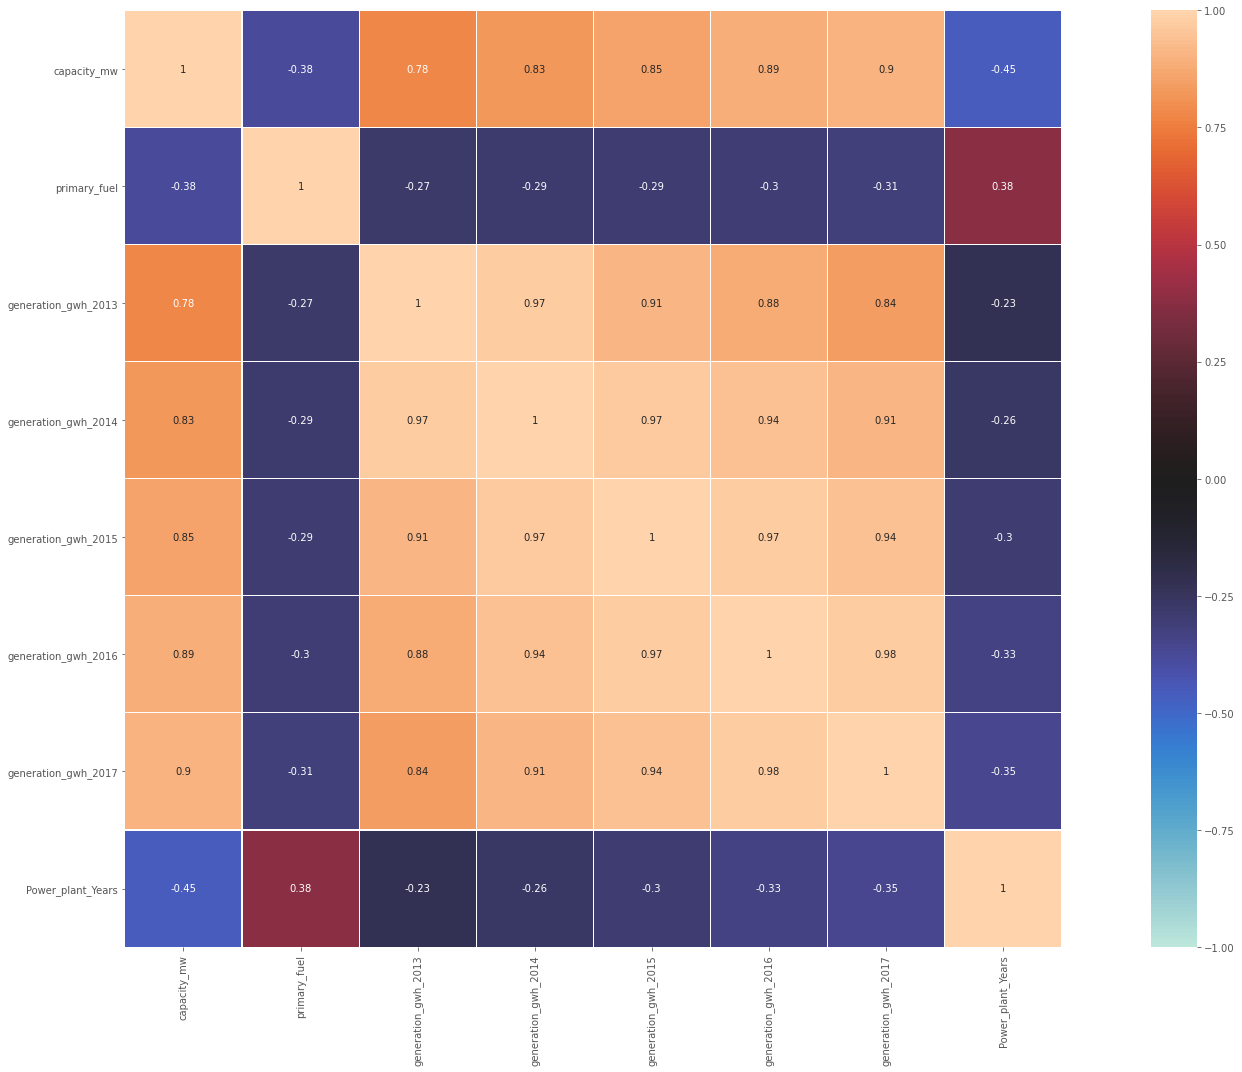

In [39]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

* We can see generation growths from every year are strongly correlated with each other, and also strongly related to __capacity_mw__
* All the features are having negative coefficient of correlation with __primary_fuel__, except power_plant_years which is positively related with __primary_fuel__
*  __primary_fuel__ and __Power_plant_years__ are negatively correlated with __capacity_mw__,rest all arein positive relation

In [40]:
#As generation_gwh_2016 and generation_gwh_2017 are strongly correlated 0.98, we will drop generation_gwh_2016 column
df.drop(columns = "generation_gwh_2016", inplace = True)

In [41]:
#check skewness of data
df.skew()

capacity_mw            3.193257
primary_fuel           0.471141
generation_gwh_2013    5.158053
generation_gwh_2014    4.989441
generation_gwh_2015    5.264211
generation_gwh_2017    4.983065
Power_plant_Years     -0.173106
dtype: float64

In [42]:
#lets have a look on data description
df.describe()

,capacity_mw,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,Power_plant_Years
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,3.205947,974.403892,1068.918194,1129.934756,1235.206195,29.023128
std,580.221767,2.281339,2716.222621,2924.098882,3103.712012,3185.504866,15.989954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,60.000000,3.000000,0.000000,0.000000,0.000000,0.000000,40.000000
75%,388.125000,6.000000,470.116200,570.095213,605.769975,708.134037,40.000000
max,4760.000000,7.000000,27586.200000,28127.000000,30539.000000,35116.000000,91.000000


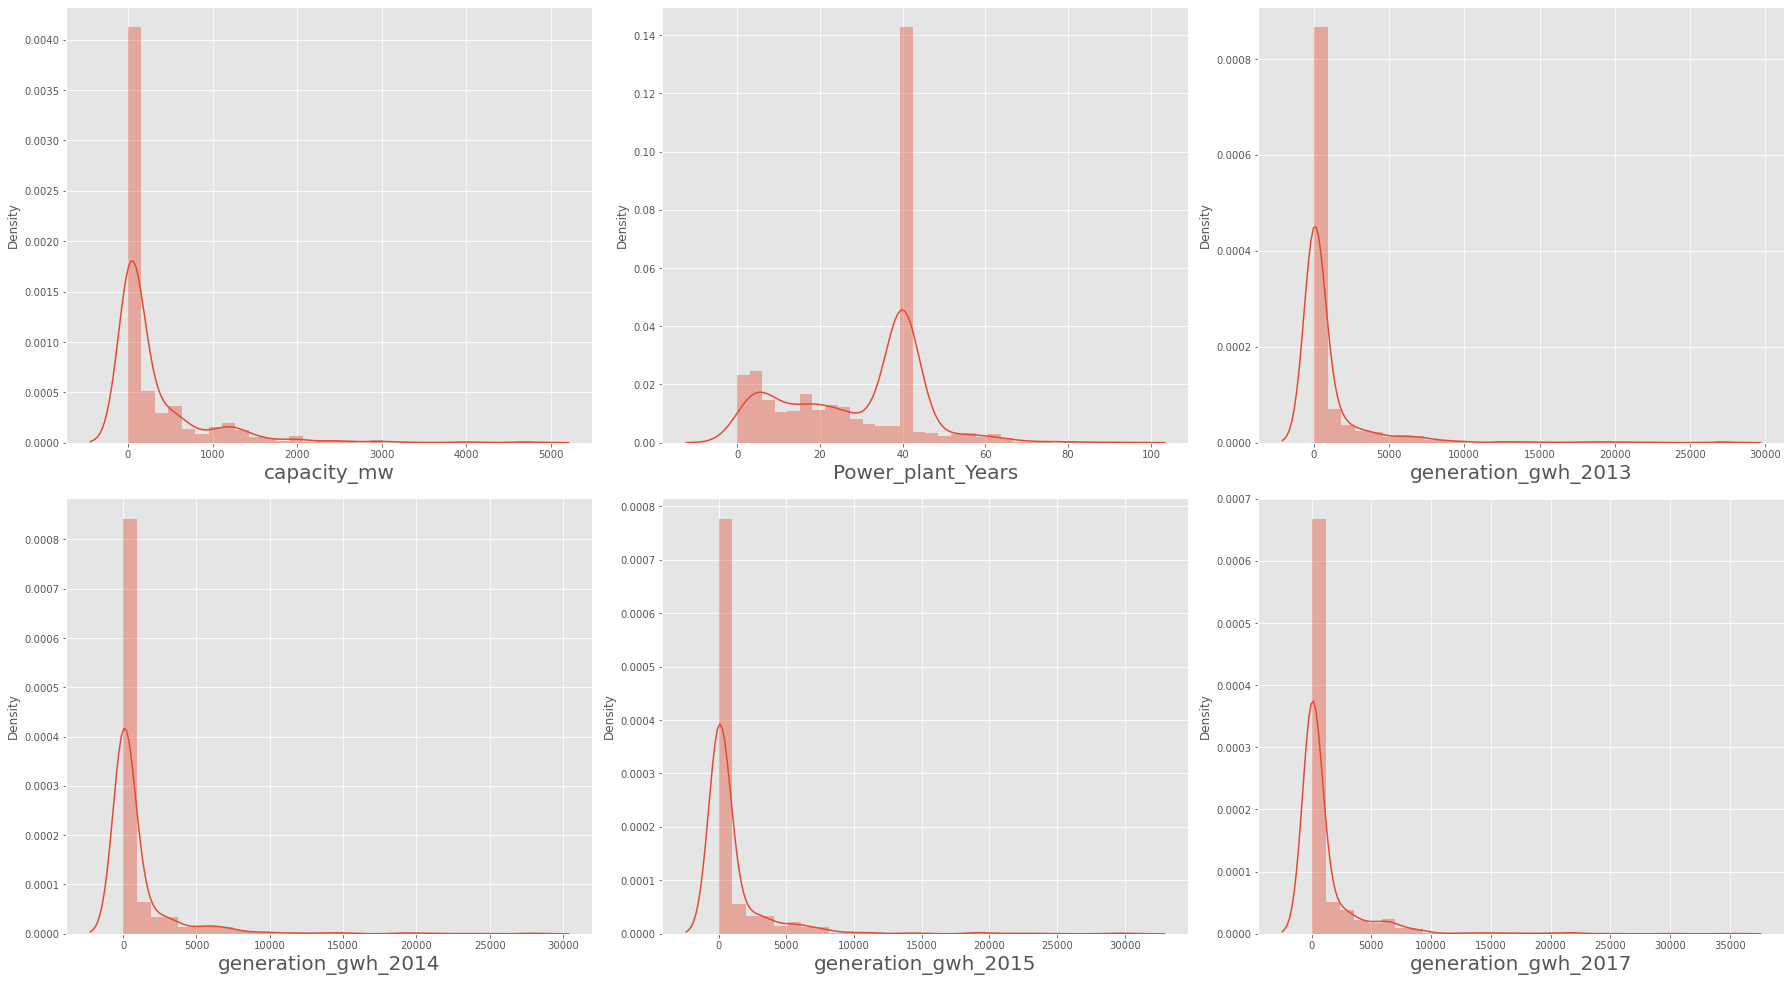

In [43]:
#Lets have a look on distribution of continuous parameters
plt.figure(figsize = (25,20))
plotnumber = 1
col = ["capacity_mw","Power_plant_Years","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2017"]
for column in col:
    if plotnumber <=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], bins=30)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()


In [44]:
# At first we will remove outliers from our data. thereafter again will check skewness
# Applying zscore method for removing outliers from skewed features
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["Power_plant_Years","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2017"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [45]:
#check the shape after removing outliers
df.shape

(886, 10)

* By removing outliers we are loosing only 3% of data, hence we are removing outliers for better results.

In [46]:
#remove index column
df.drop(columns = "index", inplace = True)

In [47]:
#lets check the skewness again
df.skew()

capacity_mw            2.193908
primary_fuel           0.435961
generation_gwh_2013    2.957048
generation_gwh_2014    2.822137
generation_gwh_2015    2.633078
generation_gwh_2017    2.473566
Power_plant_Years     -0.324230
dtype: float64

In [48]:
#lets convert categorical data into numeric values, using label encoder
leb_enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = leb_enc.fit_transform(df[i])

# 1. Prediction for capacity_mw 

   - First we will go for capacity_mw prediction & this target variable is of continuous type so its a regression problem.
    
   - we will seperate data into lable and features and will remove skewness from features

In [49]:
# first we need to saperate our data intp label and features
x = df.drop(columns = ["capacity_mw"])
y = df["capacity_mw"]

In [50]:
#still we are having skewness in our data, lets treat it using log transformation 
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [51]:
#Lets check skewness in features
x.skew()

primary_fuel           0.435961
source                 0.832924
geolocation_source    -2.120233
generation_gwh_2013    0.598769
generation_gwh_2014    0.550849
generation_gwh_2015    0.439131
generation_gwh_2017    0.380425
Power_plant_Years     -0.342156
dtype: float64

In [52]:
#seperating numerical data for applying standard scalar and bring all features to common scale
num_data = x.drop(columns = ["primary_fuel","source","geolocation_source"])
scaler = StandardScaler()
x_num = scaler.fit_transform(num_data)
x_num = pd.DataFrame(x_num,columns = num_data.columns)

In [53]:
cat_data = pd.DataFrame(x,columns = ["primary_fuel","source","geolocation_source"])

In [54]:
#Lets join both categorical data and numerical data of our features
X = x_num.join(cat_data)
X

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,Power_plant_Years,primary_fuel,source,geolocation_source
0,-0.771989,-0.790254,-0.835080,-0.860009,-1.408161,6,4.700480,1
1,-0.771989,-0.790254,-0.835080,-0.860009,0.696415,1,5.164786,2
2,-0.771989,-0.790254,-0.835080,-0.860009,0.696415,7,3.091042,2
3,1.302716,1.258968,1.258076,1.170018,-0.961736,2,3.135494,2
4,1.453014,1.484665,1.483556,1.423551,-1.663262,1,3.135494,2
...,...,...,...,...,...,...,...,...
881,-0.771989,-0.790254,-0.286369,1.205753,-1.727037,1,3.135494,2
882,-0.771989,-0.790254,-0.835080,-0.860009,0.696415,6,4.356709,0
883,-0.771989,-0.790254,-0.835080,-0.860009,0.696415,7,3.091042,2
884,-0.771989,-0.790254,-0.835080,-0.860009,0.696415,1,4.094345,2


## Finding best random_state 

In [55]:
#Lets find best random state using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
max_accu = 0
max_rs = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8750495052400636 on Random State 33


In [56]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = max_rs)

In [57]:
#Model with LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
pred_lr = lr.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_lr)*100}%")

MAE : 42.47221089486767
RMSE : 52.87452066087223
Training r2 Score : 68.97343716786128 %
Testing r2 Score: 76.28961483068078%


In [58]:
#Model with DecesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)
pred_dt = dt.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_dt)*100}%")

MAE : 33.91990328838155
RMSE : 45.596377126866926
Training r2 Score : 94.16427532291226 %
Testing r2 Score: 82.3678043338889%


In [59]:
#Model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
pred_rf = rf.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)


# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_rf)*100}%")

MAE : 27.866746616129234
RMSE : 38.358916008614976
Training r2 Score : 92.38480448822828 %
Testing r2 Score: 87.5210405280945%


In [60]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
y_pred = knr.predict(x_train)
pred_knr = knr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_knr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_knr)*100}%")

MAE : 31.323423423423428
RMSE : 43.25932071622056
Training r2 Score : 83.12166998566863 %
Testing r2 Score: 84.1289699575424%


In [61]:
#Lets use SVM regressor
from sklearn.svm import SVR
svr =  KNeighborsRegressor()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_train)
pred_svr = svr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_svr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_svr)*100}%")

MAE : 31.323423423423428
RMSE : 43.25932071622056
Training r2 Score : 83.12166998566863 %
Testing r2 Score: 84.1289699575424%


In [62]:
#lets check with XGBRegressor model
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_train)
pred_xgb = xgb.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_xgb)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_xgb)*100}%")

MAE : 30.384561955391824
RMSE : 40.89018241209434
Training r2 Score : 93.9123865113905 %
Testing r2 Score: 85.81975225822562%


## Cross validation

In [63]:
#Let's check cross validation score for all algorithms
#for LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from statistics import mean
scores = []
cv = KFold(n_splits=4, random_state=max_rs, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    scores.append(r2_score(y_test, y_pred))  
print("Cross validation score of LinearRegression model is :", mean(scores))

Cross validation score of LinearRegression model is : 0.6965887278941988


In [64]:
#for DecisionTreeRegressor
scores = []
cv = KFold(n_splits=4, random_state=max_rs, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    dt.fit(X_train,y_train)
    pred_dtr = dt.predict(X_test)
    scores.append(r2_score(y_test, pred_dtr))  
print("Cross validation score of DecisionTreeRegressor model is :", mean(scores))

Cross validation score of DecisionTreeRegressor model is : 0.7376524332866976


In [65]:
#for RandomForestRegressor
scores = []
cv = KFold(n_splits=4, random_state=max_rs, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train,y_train)
    rfr_pred = dt.predict(X_test)
    scores.append(r2_score(y_test, rfr_pred))  
print("Cross validation score of RandomForestRegressor model is :", mean(scores))

Cross validation score of RandomForestRegressor model is : 0.8751472258716007


In [66]:
#for KNeighborsRegressor
scores = []
cv = KFold(n_splits=4, random_state=max_rs, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    knr.fit(X_train,y_train)
    knr_pred = dt.predict(X_test)
    scores.append(r2_score(y_test, knr_pred))  
print("Cross validation score of KNeighborsRegressor model is :", mean(scores))

Cross validation score of KNeighborsRegressor model is : 0.8751472258716007


In [67]:
#for SVM
scores = []
cv = KFold(n_splits=4, random_state=max_rs, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    svr.fit(X_train,y_train)
    svr_pred = dt.predict(X_test)
    scores.append(r2_score(y_test, svr_pred))  
print("Cross validation score of SVM model is :", mean(scores))

Cross validation score of SVM model is : 0.8751472258716007


In [68]:
#for XGBRegressor
scores = []
cv = KFold(n_splits=4, random_state=max_rs, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    xgb.fit(X_train,y_train)
    xgb_pred = dt.predict(X_test)
    scores.append(r2_score(y_test, xgb_pred))  
print("Cross validation score of XGBRegressor model is :", mean(scores))

Cross validation score of XGBRegressor model is : 0.8751472258716007


* __Difference in accuracy score and cross validation score for different algorithms__

  • LogisticRegression = 6.63%  
  • DecisionTreeClassifier = 8.6%  
  • RandomForestClassifier = 0.01%  
  • KNeighborsClassifier = 3.39%  
  • SVC = 3.39%  
  • XGBClassifier = 1.70%

  • from above observations we can say the RandomForestClassifier is giving least difference among all algorithms. So we will choose this algorithm for hyperparameter tuning.

## Hyperparameter Tunng

In [69]:
#lets select different parameters
grid_params = {
                'max_depth': [18,20,22],
                'n_estimators':[900,1000,1200],
                'min_samples_leaf': [1],
                'bootstrap': [True, False],
                }

In [70]:
#train our model using GridSearchCV with given parameters to check best parameters
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = max_rs)
GCV =  GridSearchCV(RandomForestRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [18, 20, 22],
                         'min_samples_leaf': [1],
                         'n_estimators': [900, 1000, 1200]})

In [71]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'bootstrap': True,
 'max_depth': 18,
 'min_samples_leaf': 1,
 'n_estimators': 900}

In [72]:
#Let's train and test our model using best parameters

model = RandomForestRegressor(max_depth=18, min_samples_leaf = 1, n_estimators=900, bootstrap=True)

model.fit(x_train,y_train)
pred = model.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print("---------------------------------------------------")

print(f"r2 Score: {r2_score(y_test,pred)*100}%")

MAE : 27.7501060889707
RMSE : 38.34595716961076
---------------------------------------------------
r2 Score: 87.5294706678242%


* Great we can observe increase in r2 score after hyperparameter tuning for our final model. 
* The final accuracy is about 87.53% for predicting electricity generating capacity of plant.

### Saving the model

In [73]:
import joblib
joblib.dump(model,"plant_capacity_prediction.pkl")

['plant_capacity_prediction.pkl']

# 2. Prediction for Fuel_type

In [99]:
#we will define column primary_fuel as Fuel_type for better understanding
df.rename(columns={'primary_fuel':'Fuel_type'},inplace=True)

In [100]:
#Lets seperate label and features
df_x = df.drop(columns = "Fuel_type")
df_y = df["Fuel_type"]

In [101]:
#lets check the value counts of the target variable
df_y.value_counts()

3    247
1    240
6    127
7    123
2     69
0     50
5     21
4      9
Name: Fuel_type, dtype: int64

- __By seeing the target variable we can recognize that this is a multi-class classification problem.__

* We can see, there is a problem of imbalance. we will go for oversampling

In [102]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(df_x,df_y)

In [103]:
#Now check the target variable
y_over.value_counts()
#earlier in our target variable highest number was 247, so by oversampling it brings all the categories to that count

0    247
1    247
2    247
3    247
4    247
5    247
6    247
7    247
Name: Fuel_type, dtype: int64

In [104]:
#lets seperate numerical columns from features to bring at common scale using standard scaler
n_data = x_over.drop(columns = ["source","geolocation_source"])
scaler = StandardScaler()
num_x = scaler.fit_transform(n_data)
num_x = pd.DataFrame(num_x,columns = n_data.columns)

In [105]:
#create a dataframe with categorical data
c_data = pd.DataFrame(x_over,columns = ["source","geolocation_source"])

In [106]:
#Lets join both categorical data and numerical data of our features
df_X = num_x.join(c_data)
df_X

,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,Power_plant_Years,source,geolocation_source
0,-1.416191,-0.637001,-0.650690,-0.663581,-0.642489,-1.660901,109,1
1,0.205519,-0.637001,-0.650690,-0.663581,-0.642489,0.760491,174,2
2,-0.347771,-0.637001,-0.650690,-0.663581,-0.642489,0.760491,21,2
3,0.434466,0.842254,0.717591,0.941130,0.749708,-1.147272,22,2
4,1.769992,1.501795,1.743802,2.179284,2.023922,-1.954403,22,2
...,...,...,...,...,...,...,...,...
1971,-0.862902,-0.637001,-0.650690,-0.663581,-0.642489,0.760491,21,2
1972,-1.244481,-0.637001,-0.650690,-0.663581,-0.642489,0.760491,21,2
1973,-0.681652,-0.637001,-0.650690,-0.663581,-0.642489,0.760491,21,2
1974,-0.376389,-0.637001,-0.650690,-0.663581,-0.642489,0.760491,21,2


### Finding best random_state

In [107]:
#model with DecisionTreeClassifier
from sklearn.tree  import DecisionTreeClassifier
#Import required accuracy metrics for classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

max_accu = 0
max_rs = 0
for i in range(150,200):
    x_train,x_test,y_train,y_test = train_test_split(df_X,y_over,test_size = 0.25, random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8704453441295547 on Random State 199


In [108]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(df_X, y_over, test_size = 0.25, random_state = max_rs )

In [109]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 86.23481781376519%
---------------------------------------------------
Confusion Matrix : 
 [[59  4  3  0  0  1  0  0]
 [ 4 34  6  5  7  1  0  0]
 [ 0  1 52  7  0  4  0  0]
 [ 0  7  3 37  2  0  0  0]
 [ 0  1  0  1 65  0  0  0]
 [ 0  4  2  2  2 48  1  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 63]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        67
           1       0.67      0.60      0.63        57
           2       0.79      0.81      0.80        64
           3       0.71      0.76      0.73        49
           4       0.86      0.97      0.91        67
           5       0.89      0.81      0.85        59
           6       0.99      1.00      0.99        68
           7       1.00      1.00      1.00        63

    accuracy                           0.86       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.86      0.86      0.86       49

In [110]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 88.66396761133603%
---------------------------------------------------
Confusion Matrix : 
 [[62  0  3  0  0  2  0  0]
 [ 3 33  7  6  7  1  0  0]
 [ 0  0 58  1  0  5  0  0]
 [ 0  7  3 39  0  0  0  0]
 [ 0  0  1  2 64  0  0  0]
 [ 0  3  2  2  1 51  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 63]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.77      0.58      0.66        57
           2       0.78      0.91      0.84        64
           3       0.78      0.80      0.79        49
           4       0.89      0.96      0.92        67
           5       0.86      0.86      0.86        59
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        63

    accuracy                           0.89       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.89      0.89      0.88       49

In [111]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_kn)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

Accuracy Score: 77.93522267206477%
---------------------------------------------------
Confusion Matrix : 
 [[54  4  1  0  0  3  5  0]
 [ 7 29  9  4  7  0  1  0]
 [ 1  2 48  1  2 10  0  0]
 [ 0  9  6 32  1  1  0  0]
 [ 3  0  1  2 61  0  0  0]
 [12  4  2  0  3 37  1  0]
 [ 7  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 63]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.64      0.81      0.72        67
           1       0.60      0.51      0.55        57
           2       0.72      0.75      0.73        64
           3       0.82      0.65      0.73        49
           4       0.82      0.91      0.87        67
           5       0.73      0.63      0.67        59
           6       0.90      0.90      0.90        68
           7       1.00      1.00      1.00        63

    accuracy                           0.78       494
   macro avg       0.78      0.77      0.77       494
weighted avg       0.78      0.78      0.78       49

In [112]:
#model with SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_svc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_svc)}")

Accuracy Score: 36.23481781376518%
---------------------------------------------------
Confusion Matrix : 
 [[42  0  0  8  0  0 14  3]
 [ 6  0  0 16 28  0  5  2]
 [ 0  0  0 55  3  0  6  0]
 [ 0  0  0 45  4  0  0  0]
 [ 5  0  0  7 55  0  0  0]
 [10  0  0 36  0  0 12  1]
 [23  0  0  0  0  0 37  8]
 [ 0  0  0 63  0  0  0  0]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.49      0.63      0.55        67
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00        64
           3       0.20      0.92      0.32        49
           4       0.61      0.82      0.70        67
           5       0.00      0.00      0.00        59
           6       0.50      0.54      0.52        68
           7       0.00      0.00      0.00        63

    accuracy                           0.36       494
   macro avg       0.22      0.36      0.26       494
weighted avg       0.24      0.36      0.27       49

In [113]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_xgb)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

[17:15:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------------------------------------------
Accuracy Score: 88.25910931174089%
------------------------------------------------------
Confusion Matrix : 
 [[58  3  4  0  0  2  0  0]
 [ 2 36  8  5  5  1  0  0]
 [ 0  0 58  1  0  5  0  0]
 [ 0  8  3 38  0  0  0  0]
 [ 0  1  0  2 64  0  0  0]
 [ 0  5  1  1  1 51  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 63]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.97      0.87      0.91        67
           1       0.68      0.63      0.65        57
           2       0.78      0.91      0.84        64
           3       0.81      0.78      0.79        49
       

## Cross-validation

In [114]:
#Let's check cross validation score for DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
scores = cross_val_score(dt, df_X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of DecisionTreeClassifier model is :", scores.mean())

Cross validation score of DecisionTreeClassifier model is : 0.8340071602096918


In [115]:
#Let's check cross validation score for RandomForestClassifier
scores = cross_val_score(rf, df_X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of RandomForestClassifier model is :", scores.mean())

Cross validation score of RandomForestClassifier model is : 0.881584196394323


In [116]:
#Let's check cross validation score for KNeighborsClassifier
scores = cross_val_score(kn, df_X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of KNeighborsClassifier model is :", scores.mean())

Cross validation score of KNeighborsClassifier model is : 0.77833397263777


In [117]:
#Let's check cross validation score for SVC
scores = cross_val_score(svc, df_X, y_over, cv=5, scoring = "accuracy")
print("Cross validation score of SVC model is :", scores.mean())

Cross validation score of SVC model is : 0.39874952052167245


In [118]:
#Let's check cross validation score for XGBClassifier
scores = cross_val_score(xgb,df_X, y_over, cv=5, scoring = "accuracy")
print('---------------------------------------------------------------------')
print("Cross validation score of XGBClassifier model is :", scores.mean())

[17:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

__Difference in accuracy score and cross validation score for different algorithms__
* DecisionTreeClassifier = 2.83%
* RandomForestClassifier = 0.15%
* KNeighborsClassifier = 0.10%
* SVC = 3.64%
* XGBClassifier = 0.55%

     • from above observations we can say that KNeighborsClassifier is giving least difference in accuracy and cv-score, but it shows very less precision, recall and f1score, so I am prefering to go with RandomForestClassifier as a best suitable algorithm as it is giving least difference next to KNeighborsClassifier.

## Hyperparameter Tuning

In [119]:
#lets select different parameters
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [5,9,10,12,15],
                'n_estimators':[100,200,500,700],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2,3,4,6]
                }

In [120]:
#Use GridSearchCV and train with given parameters to select best parameters
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 9, 10, 12, 15],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 6],
                         'n_estimators': [100, 200, 500, 700]})

In [121]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 700}

In [122]:
#Let's train and test our model using best parameters
model_2 = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2', n_estimators=700, min_samples_split = 2)

model_2.fit(x_train,y_train)
prediction = model_2.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,prediction)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,prediction)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,prediction)}")
print("---------------------------------------------------")


Accuracy Score: 88.8663967611336%
---------------------------------------------------
Confusion Matrix : 
 [[63  0  2  0  0  2  0  0]
 [ 3 34  7  5  7  1  0  0]
 [ 0  0 57  2  0  5  0  0]
 [ 0  8  2 38  1  0  0  0]
 [ 0  0  1  2 64  0  0  0]
 [ 0  3  2  1  1 52  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 63]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.76      0.60      0.67        57
           2       0.80      0.89      0.84        64
           3       0.79      0.78      0.78        49
           4       0.88      0.96      0.91        67
           5       0.87      0.88      0.87        59
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        63

    accuracy                           0.89       494
   macro avg       0.88      0.88      0.88       494
w

__Great we have improved our model accuracy by doing hyperparameter tuning from 88.66% to 88.86%.__

## ROC Curve and AUC for final model

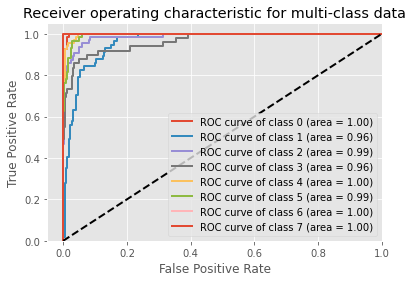

In [155]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc


# Learn to predict each class against the other
classifier = OneVsRestClassifier(model_2)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
   
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


* This plot shows roc curve for each class of our target variable

## Model Saving

In [156]:
joblib.dump(model,"plant_FuelType_prediction.pkl")

['plant_FuelType_prediction.pkl']

## Conclusion :
* Final R2 score for predicting __Capacity__ of plant = 87.53% (Regression)
* Final accuracy for predicting __Fuel type__ of plant = 88.86% (Classification)

We can say that prediction for Fuel_type of plants for this dataset is giving more accuracy than that of prediction for capacity_mw.